# Brain regions associated with happiness ☺️ 
**Home Assignment**
+ **Vivienne Kurth** (2867361)
+ **Date:** November 27th
+ **Neurosynth Happy Dataset:** https://neurosynth.org/analyses/terms/happy/


## Task description
Write your own version-controlled python code to visualize fMRI data. The data is publicly available on Neurosynth, a meta-study platform that hosts brain maps that illustrate the strength of the association between specific brain regions and certain cognitive concepts or clinically relevant terms. 

**My chosen term**: happy

Create a new project from scratch, which includes setting up a conda environment, writing your code and uploading it to GitHub for version control and for writing and receiving feedback.

## The Code

### Step 1: Automatic localization of the fMRI data files

In [ ]:
# import libraries
import os
import glob
import shutil


# function that finds all files in the current working directory with a certaine extension and gathers them in a list
def findfiles(file_extension):
    # create empty list
    mri_files = []

    # get current working directory
    source = os.getcwd()

    # search for files and their paths recursively 
    find_files = os.path.join(source, file_extension)
    all_files = glob.glob(find_files, recursive=True)

    # append file paths to list
    for file in all_files:
        mri_files.append(file)

    return mri_files


# call function for all files with the extension .nii (the downloaded data)
nii_files = findfiles("*.nii")

### Step 2: Visualization of fMRI data ontop of the anatomical scan

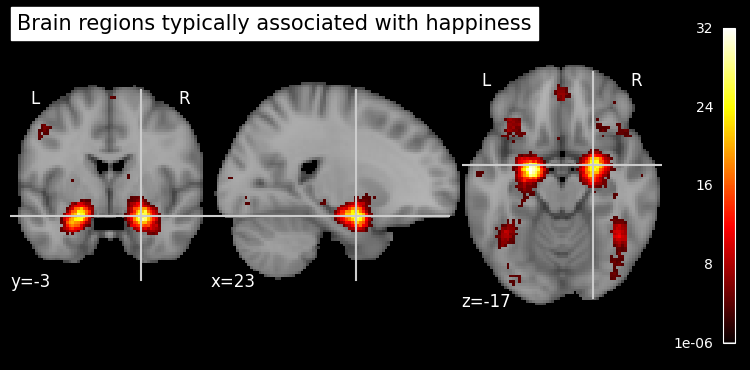

In [ ]:
# import libraries
from nilearn import plotting, image

# load anatomical and functional scans using nilearn image module
anatomical_scan = image.load_img(nii_files[0])
happy_scan = image.load_img(nii_files[1])

# visualize data by putting the fMRI data of "happy" above the anatomical scan
visualization = plotting.plot_stat_map(
    happy_scan,
    anatomical_scan,
    title="Brain regions typically associated with happiness",
    cmap="hot",
    vmin=0.1,
    cut_coords=(23, -3, -17),
)

### Step 3: Plotting a histogram of values in the functional data file

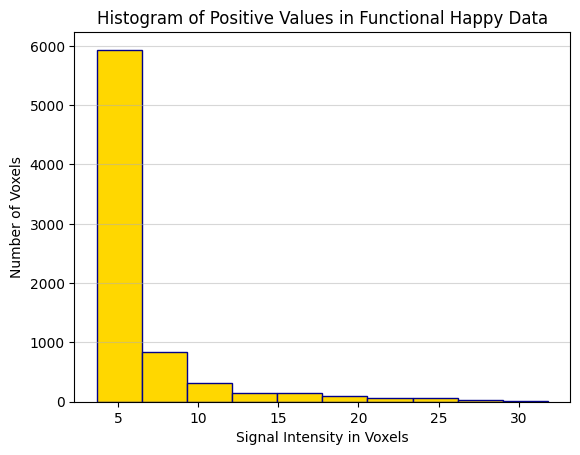

In [ ]:
# import libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# extract data from fMRI scan "happy"
happy_data = happy_scan.get_fdata()

# select all positive values (values > 0)
positive_values = happy_data[happy_data > 0]

# plot histogram for the positive values
fig, ax = plt.subplots(1, 1)
plt.hist(positive_values, color="gold", edgecolor="darkblue")

# adding title, labels and grid
plt.title("Histogram of Positive Values in Functional Happy Data")
plt.xlabel("Signal Intensity in Voxels")
plt.ylabel("Number of Voxels")
plt.grid(axis="y", alpha=0.5)

**Evaluation:** a right-skewed histogram (most values on the left, few on the right) indicates that many voxels have low activation or signal values, with fewer voxels showing high activation when faced with the emotion "happiness".

### Step 4: visualize the brain slice with the point of highest activation (for fun!)

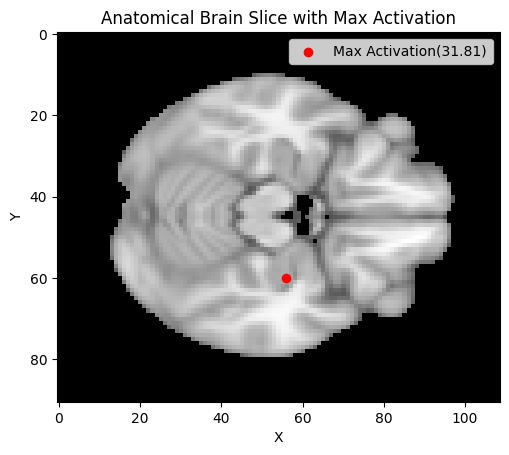

In [9]:
# extract data from anatomical scan
anatomical_data = anatomical_scan.get_fdata()

# find maximum value and its index in the positive fMRI data
max_value = np.max(positive_values)
max_value_index = np.unravel_index(np.argmax(happy_data), happy_data.shape)

# extract anatomical data at maximum activation voxel
max_activation_anatomical_value = anatomical_data[max_value_index]

# plot anatomical brain slice of maximum activation and overlay in maximum activation point (scatter plot)
fix, ax = plt.subplots(1, 1)
ax.imshow(anatomical_data[:, :, max_value_index[2]], cmap="gray")
ax.scatter(
    max_value_index[0],
    max_value_index[1],
    color="red",
    label=f"Max Activation({max_value:.2f})",
)

# Add title, labels and legend
ax.set_title("Anatomical Brain Slice with Max Activation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()